In [25]:
# pip install autokeras

In [26]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [27]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [28]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [29]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [30]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [31]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [32]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [33]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [34]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [35]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [36]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [37]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 32/2-1

In [38]:
blind = training_data[training_data['WELL'] == '25/10-10  Balder Triassic']
training_data = training_data[training_data['WELL'] != '25/10-10  Balder Triassic']

In [39]:
blind['Facies'].unique()

array([6, 5, 7, 4])

In [40]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [41]:
training_data['WELL'] = training_data['WELL'].astype('category')

/tmp/ipykernel_827995/4154894922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['WELL'] = training_data['WELL'].astype('category')


In [42]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

/tmp/ipykernel_827995/805301228.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,1106.661636,554.625395,84.603521,7.120582,2.068850,0.441895,2.445272,0.444403,2727.514574
std,352.014203,229.875939,42.531395,3.544087,7.905972,0.455715,0.151514,0.456893,806.463487
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,947.532465,428.624351,57.623103,5.000000,0.206353,0.152812,2.360203,0.154191,2068.077698
50%,1122.756091,580.014596,80.286850,6.000000,0.282810,0.397062,2.474200,0.406591,2637.434326
75%,1250.394469,678.348782,105.959152,10.000000,0.354700,0.678576,2.558000,0.691040,3224.223145
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [43]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

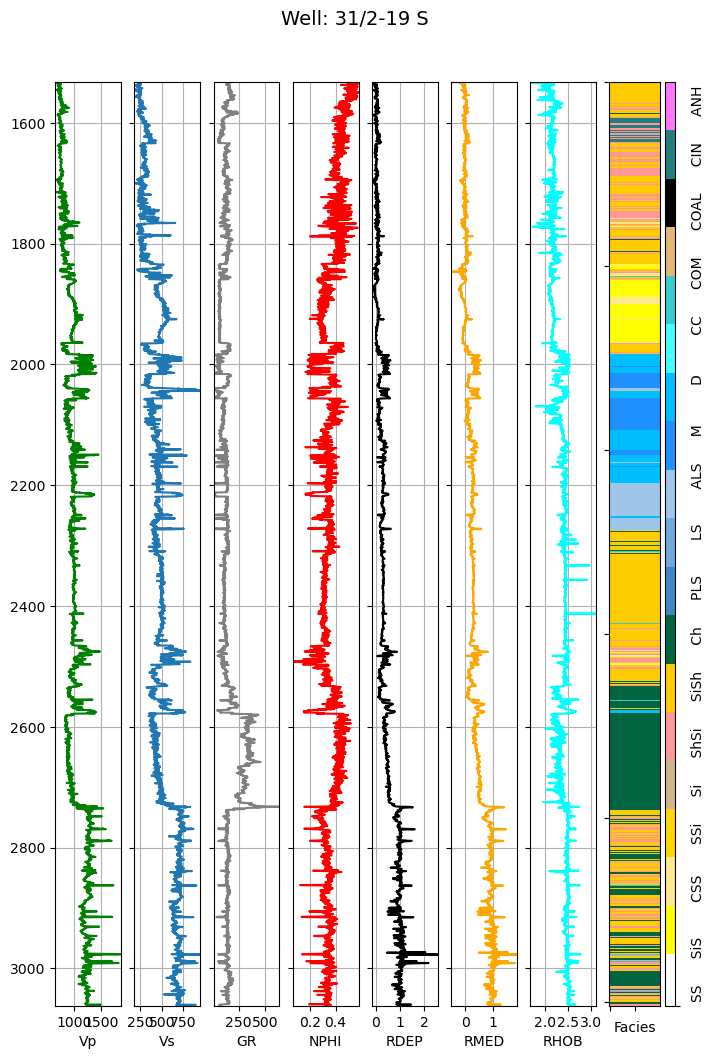

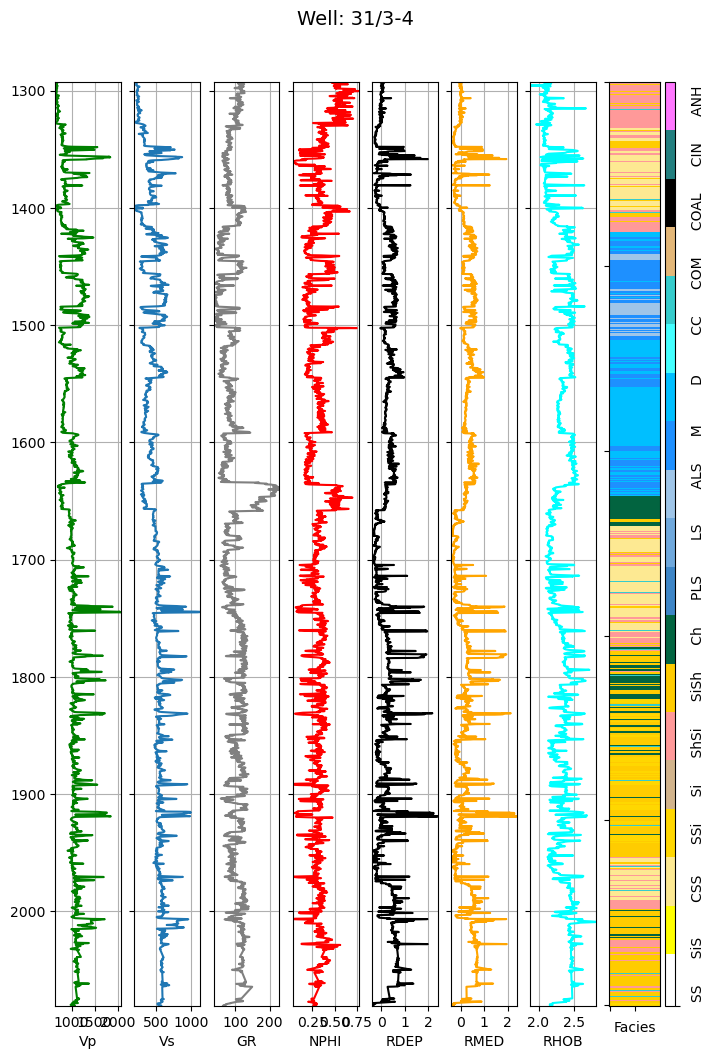

In [44]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/3-4'],
    facies_colors)

SS       8282
SiS     12448
CSS      4001
SSi      5783
Si      31375
ShSi    36398
SiSh    25752
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2968
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

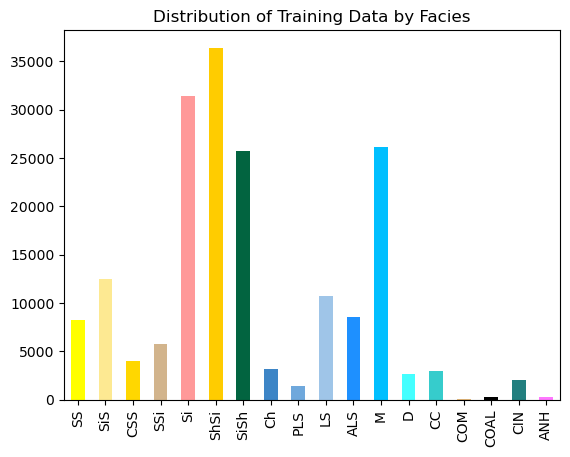

In [45]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [46]:
correct_facies_labels = training_data['Facies'].values

feature_vectors = training_data.drop(['WELL', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,Vp,Vs,GR,NPHI,RDEP,RHOB,RMED
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,1106.661636,554.625395,84.603521,2.068850,0.441895,2.445272,0.444403
std,352.014203,229.875939,42.531395,7.905972,0.455715,0.151514,0.456893
min,261.159283,97.222720,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,947.532465,428.624351,57.623103,0.206353,0.152812,2.360203,0.154191
50%,1122.756091,580.014596,80.286850,0.282810,0.397062,2.474200,0.406591
75%,1250.394469,678.348782,105.959152,0.354700,0.678576,2.558000,0.691040
max,5519.963395,2875.440293,1163.366455,61.007858,4.466433,3.217700,4.000000


In [47]:
# Perform Standard scaler for the dataset

# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler().fit(feature_vectors)
# scaled_features = scaler.transform(feature_vectors)

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(feature_vectors)

In [49]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['Vp','Vs','GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,Vp,Vs,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,0.114702,0.099379,0.083138,0.006665,0.142385,0.626336,0.152341
1,0.114395,0.097175,0.093512,0.006657,0.143661,0.637482,0.152837
2,0.113823,0.093463,0.108347,0.006930,0.144494,0.622738,0.157127
3,0.112439,0.091937,0.128290,0.006929,0.144328,0.626893,0.160517
4,0.108457,0.088805,0.140744,0.007228,0.141757,0.621624,0.153864
...,...,...,...,...,...,...,...
182253,0.135824,0.248250,0.026156,0.002976,0.155001,0.552382,0.167298
182254,0.135574,0.248258,0.027886,0.003136,0.157700,0.568448,0.170710
182255,0.135495,0.248257,0.031487,0.003248,0.161697,0.575162,0.175559
182256,0.136785,0.248279,0.035724,0.003127,0.163284,0.565613,0.177819


In [50]:
scaled_features

array([[0.11470207, 0.09937899, 0.08313799, ..., 0.14238493, 0.62633575,
        0.15234146],
       [0.11439464, 0.09717496, 0.09351173, ..., 0.14366075, 0.63748226,
        0.15283702],
       [0.11382286, 0.09346266, 0.10834658, ..., 0.14449404, 0.62273838,
        0.15712707],
       ...,
       [0.1354947 , 0.24825687, 0.03148674, ..., 0.16169702, 0.57516162,
        0.17555927],
       [0.13678475, 0.24827911, 0.03572392, ..., 0.16328424, 0.56561314,
        0.17781941],
       [0.14308297, 0.24843931, 0.03197682, ..., 0.16182188, 0.55177223,
        0.176841  ]])

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=123)

In [52]:
x_train

array([[0.15665866, 0.14918159, 0.10295618, ..., 0.19183367, 0.64974362,
        0.22020528],
       [0.17382786, 0.03540376, 0.07622991, ..., 0.27568955, 0.68525435,
        0.32930081],
       [0.17699672, 0.1879289 , 0.05775732, ..., 0.23962828, 0.60394125,
        0.26456945],
       ...,
       [0.14321613, 0.15216823, 0.04214652, ..., 0.20447165, 0.54795417,
        0.23235545],
       [0.23275819, 0.24612277, 0.00914224, ..., 0.2395565 , 0.67674824,
        0.26575466],
       [0.15012444, 0.15092774, 0.07660819, ..., 0.15423897, 0.4966805 ,
        0.16786441]])

# AutoML Structured Data Classifier (Feed-Forward NN) using AutoKeras
## Version #4: Standard scaler, 100 trials, 100 epochs.

In [53]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=100)

# Feed the structured data classifier with training data.
clf.fit(x_train, y_train, epochs=100, verbose=1)

# Predict with the best model.
predicted_y = clf.predict(x_test)

# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 99 Complete [00h 01m 50s]
val_accuracy: 0.5817258358001709

Best val_accuracy So Far: 0.7893869876861572
Total elapsed time: 1d 18h 24m 11s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
4557/4557 [==============================] - 11s 2ms/step - loss: 1.7754 - accuracy: 0.4372
Epoch 2/100
4557/4557 [==============================] - 10s 2ms/step - loss: 1.2232 - accuracy: 0.5667
Epoch 3/100
4557/4557 [==============================] - 10s 2ms/step - loss: 1.1049 - accuracy: 0.6036
Epoch 4/100
4557/4557 [==============================] - 10s 2ms/step - loss: 1.0344 - accuracy: 0.6278
Epoch 5/100
4557/4557 [==============================] - 10s 2ms/step - loss: 0.9831 - accuracy: 0.6449
Epoch 6/100
4557/4557 [==============================] - 10s 2ms/step - loss: 0.9416 - accuracy: 0.6583
Epoch 7/100
4557/4557 [==============================] - 10s 2ms/step - loss: 0.9064 - accuracy: 0.6692
Epoch 8/100
4557/4557 [==============================] - 10s 2ms/step - loss: 0.8762 - a

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


1140/1140 [==============================] - 1s 875us/step - loss: 0.5787 - accuracy: 0.7926
[0.5786911845207214, 0.7926039695739746]


In [54]:
model = clf.export_model()
model.summary()
# numpy array in object (mixed type) is not supported.
# convert it to unicode.

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

# try:
#     model.save("model_autokeras_facies_best.h5")
# except Exception:
#     model.save("model_autokeras_facies_best", save_format="tf")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 7)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               2048      
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              263168

In [55]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

# The confusion matrix helps visualize the performance of the algorithm.
y_pred_AK = np.squeeze(np.array([predicted_y.astype(int)]))
cm = metrics.confusion_matrix(y_test, y_pred_AK)

# compute and print accuracy score
print('Testing accuracy score is: {0:0.4f}'. format(accuracy_score(y_test, y_pred_AK)))

Testing accuracy score is: 0.7926


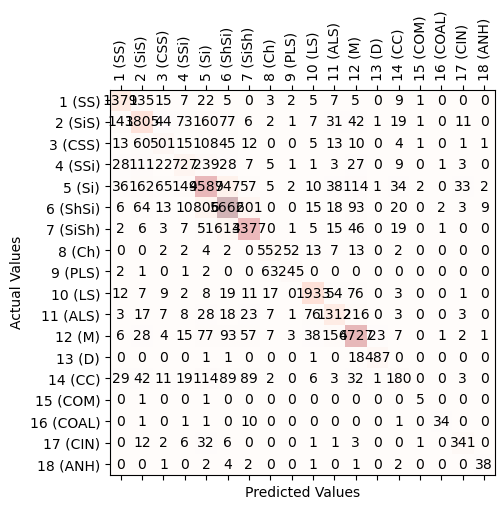

              precision    recall  f1-score   support

           1       0.83      0.86      0.85      1595
           2       0.74      0.74      0.74      2423
           3       0.72      0.63      0.67       789
           4       0.70      0.60      0.65      1212
           5       0.73      0.73      0.73      6244
           6       0.74      0.77      0.76      7322
           7       0.83      0.85      0.84      5146
           8       0.83      0.85      0.84       649
           9       0.80      0.78      0.79       314
          10       0.91      0.90      0.91      2152
          11       0.79      0.76      0.78      1722
          12       0.87      0.90      0.89      5245
          13       0.95      0.96      0.95       508
          14       0.58      0.29      0.39       620
          15       0.45      0.71      0.56         7
          16       0.87      0.71      0.78        48
          17       0.85      0.84      0.85       405
          18       0.75    

In [56]:
%matplotlib inline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
squad = ['1 (SS)','2 (SiS)','3 (CSS)','4 (SSi)','5 (Si)','6 (ShSi)','7 (SiSh)','8 (Ch)','9 (PLS)','10 (LS)',
         '11 (ALS)', '12 (M)', '13 (D)', '14 (CC)', '15 (COM)', '16 (COAL)', '17 (CIN)', '18 (ANH)']

ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=90)
ax.set_yticks(x1)
ax.set_yticklabels(squad)

plt.show()
print(classification_report(y_test, y_pred_AK))

## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [57]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
29906,879.734297,531.486884,104.114601,6,0.359786,-0.080658,2.343568,-0.114187,25/10-10 Balder Triassic,2035.807861
29907,903.860550,536.892870,95.020187,6,0.307842,-0.080660,2.308728,-0.114187,25/10-10 Balder Triassic,2035.960327
29908,929.494319,552.153044,75.242706,5,0.267265,-0.088510,2.278948,-0.099274,25/10-10 Balder Triassic,2036.112671
29909,1022.698217,561.439436,50.355732,5,0.255010,-0.258052,2.231838,-0.280654,25/10-10 Balder Triassic,2036.265137
29910,981.500565,563.583814,33.667233,5,0.249209,-0.385077,2.223314,-0.380102,25/10-10 Balder Triassic,2036.417481
...,...,...,...,...,...,...,...,...,...,...
32362,1500.598364,753.585759,74.448921,5,0.120372,0.860046,2.757251,0.864044,25/10-10 Balder Triassic,2486.911865
32363,1339.678627,725.472491,79.685616,5,0.159338,0.885976,2.719760,0.891194,25/10-10 Balder Triassic,2487.064209
32364,1338.209773,686.562767,90.572899,5,0.198400,0.865347,2.684200,0.882314,25/10-10 Balder Triassic,2487.216797
32365,1276.740695,665.548550,93.055023,6,0.229350,0.747768,2.649256,0.784358,25/10-10 Balder Triassic,2487.369141


In [58]:
y_blind = blind['Facies'].values
well_features = blind.drop(['Facies', 'WELL', 'Depth'], axis=1)
x_blind = scaler.transform(well_features)

In [59]:
y_pred = clf.predict(x_blind)
blind['Prediction'] = y_pred.astype(float)

77/77 [==============================] - 0s 756us/step


/tmp/ipykernel_827995/772409661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind['Prediction'] = y_pred.astype(float)


In [60]:
blind

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction
29906,879.734297,531.486884,104.114601,6,0.359786,-0.080658,2.343568,-0.114187,25/10-10 Balder Triassic,2035.807861,7.0
29907,903.860550,536.892870,95.020187,6,0.307842,-0.080660,2.308728,-0.114187,25/10-10 Balder Triassic,2035.960327,6.0
29908,929.494319,552.153044,75.242706,5,0.267265,-0.088510,2.278948,-0.099274,25/10-10 Balder Triassic,2036.112671,5.0
29909,1022.698217,561.439436,50.355732,5,0.255010,-0.258052,2.231838,-0.280654,25/10-10 Balder Triassic,2036.265137,2.0
29910,981.500565,563.583814,33.667233,5,0.249209,-0.385077,2.223314,-0.380102,25/10-10 Balder Triassic,2036.417481,1.0
...,...,...,...,...,...,...,...,...,...,...,...
32362,1500.598364,753.585759,74.448921,5,0.120372,0.860046,2.757251,0.864044,25/10-10 Balder Triassic,2486.911865,3.0
32363,1339.678627,725.472491,79.685616,5,0.159338,0.885976,2.719760,0.891194,25/10-10 Balder Triassic,2487.064209,6.0
32364,1338.209773,686.562767,90.572899,5,0.198400,0.865347,2.684200,0.882314,25/10-10 Balder Triassic,2487.216797,6.0
32365,1276.740695,665.548550,93.055023,6,0.229350,0.747768,2.649256,0.784358,25/10-10 Balder Triassic,2487.369141,6.0


In [61]:
# A function to plot comparison between actual and predicted facies classes, along with its features (seven well logs)

def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=9, figsize=(9, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im1 = ax[7].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im2 = ax[8].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[8])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    ax[8].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([]); ax[6].set_yticklabels([]); ax[6].set_xticklabels([])
    ax[7].set_xticklabels([]); ax[7].set_yticklabels([]); ax[8].set_xticklabels([]); ax[8].set_yticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

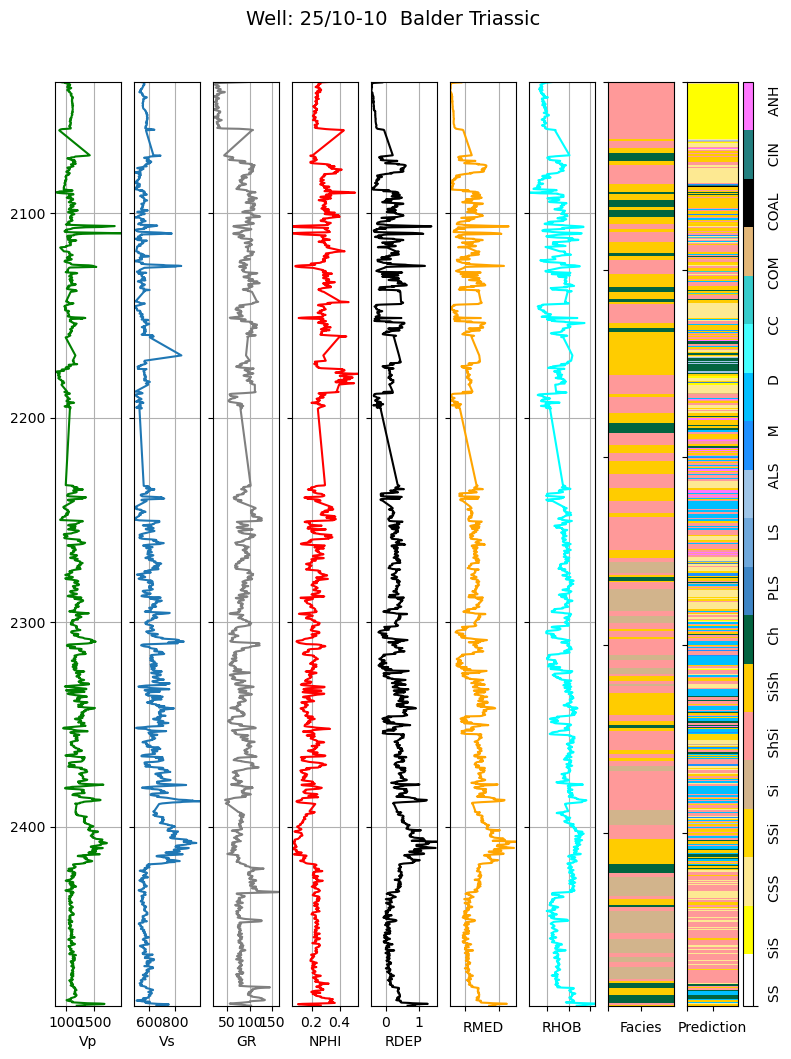

In [62]:
compare_facies_plot(blind, 'Prediction', facies_colors)

In [63]:
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction'])

# compute and print accuracy score
print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction'])))

Blind test accuracy score is: 0.2361


In [65]:
blind_data_save = blind
blind_data_save.to_csv('well25_FF2_facies.csv', index=False)